A1Z54EM24Y40LL    c2    17    3.8823529411764706
A2SZLNSI5KOQJT    Carrie, "Formerly &#34;Sister Carrie&#34;"    10    3.8
A35R32TA60XD57    M. Torma    9    4.111111111111111
A281NPSIMI1C2R    Rebecca of Amazon "The Rebecca Review"    8    5.0
A3NHUQ33CFH3VM    Citizen John    7    3.142857142857143
A3PJZ8TU8FDQ1K    Jared Castle    7    4.714285714285714
A3OXHLG6DIBRW8    C. F. Hill "CFH"    7    4.428571428571429
ABQN42N7ICNZQ    T.O. Perspective    6    4.333333333333333
A3TX6CWSZL02PW    LaVerne ":LaVerne"    6    5.0
AQ6SHOW0VMZGF    K. Padgett "familyof5"    6    2.6666666666666665


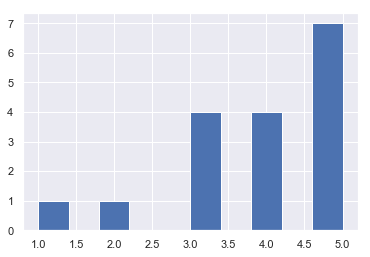

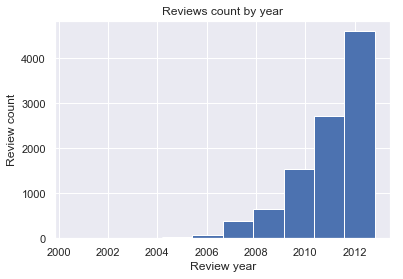

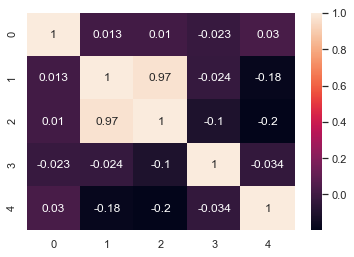

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
picture = [] 
date = []

pd_data = pd.read_csv("Reviews.csv")
pd_data = pd_data[:10000]
top10 = pd_data['UserId'].value_counts()
top10 = top10[:10]
reviewers = pd_data.groupby('UserId').agg({'Score':'sum'})
#print(reviewers)
for i in range(10):
    print(top10.index[i], end ="    ")
    #print(top10.iloc[i])
    name = (pd_data.loc[pd_data['UserId'] == top10.index[i]]).iloc[1]['ProfileName']
    print(name, end ="    ")
    print(top10.iloc[i], end ="    ")
    print(reviewers.loc[top10.index[i]].loc['Score'] / top10.iloc[i])
    #print(reviewers.loc[reviewers['UserId'] == top10.index[i]])
picture_data = pd_data.loc[pd_data['UserId'] == top10.index[0]]
del picture_data['Id']
del picture_data['ProfileName']
del picture_data['ProductId']
del picture_data['Time']
del picture_data['Summary']
del picture_data['Text']
del picture_data['UserId']
del picture_data['HelpfulnessNumerator']
del picture_data['HelpfulnessDenominator']
for i in range(len(picture_data.index)):
    picture.append(picture_data.iloc[i]['Score'])
plt.hist(picture)
plt.show()
for i in range(len(pd_data.index)):
    date.append(1970+pd_data.iloc[i]['Time']/60/60/24/365.25)
plt.xlabel("Review year")
plt.ylabel("Review count")
plt.title("Reviews count by year")
plt.hist(date)
plt.show()  
heat = np.array(
    [[pd_data['Id'].corr(pd_data['Id']), pd_data['Id'].corr(pd_data['HelpfulnessNumerator']), pd_data['Id'].corr(pd_data['HelpfulnessDenominator']), pd_data['Id'].corr(pd_data['Score']), pd_data['Id'].corr(pd_data['Time']), ],
    [pd_data['HelpfulnessNumerator'].corr(pd_data['Id']), pd_data['HelpfulnessNumerator'].corr(pd_data['HelpfulnessNumerator']), pd_data['HelpfulnessNumerator'].corr(pd_data['HelpfulnessDenominator']), pd_data['HelpfulnessNumerator'].corr(pd_data['Score']), pd_data['HelpfulnessNumerator'].corr(pd_data['Time']) ],
    [pd_data['HelpfulnessDenominator'].corr(pd_data['Id']), pd_data['HelpfulnessDenominator'].corr(pd_data['HelpfulnessNumerator']), pd_data['HelpfulnessDenominator'].corr(pd_data['HelpfulnessDenominator']), pd_data['HelpfulnessDenominator'].corr(pd_data['Score']), pd_data['HelpfulnessDenominator'].corr(pd_data['Time']) ],
    [pd_data['Score'].corr(pd_data['Id']), pd_data['Score'].corr(pd_data['HelpfulnessNumerator']), pd_data['Score'].corr(pd_data['HelpfulnessDenominator']), pd_data['Score'].corr(pd_data['Score']), pd_data['Score'].corr(pd_data['Time']) ],
    [pd_data['Time'].corr(pd_data['Id']), pd_data['Time'].corr(pd_data['HelpfulnessNumerator']), pd_data['Time'].corr(pd_data['HelpfulnessDenominator']), pd_data['Time'].corr(pd_data['Score']), pd_data['Time'].corr(pd_data['Time']) ]]
)
sns.set()
sns.heatmap(heat, annot=True)

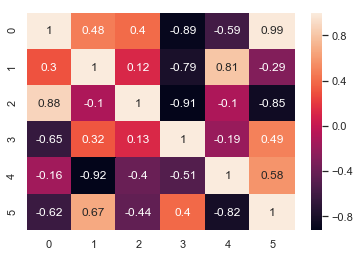

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = np.random.random((6,6)) * 2 - 1
data = data + 2 * np.eye(6)
data = np.clip(data, -1, 1)
sns.set()
sns.heatmap(data, annot=True)